In [76]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold


In [ ]:
#Load data
data = pd.read_csv('Colombia.csv')
data.head()

In [ ]:
# choosing cols to drop
drop = ["Country Name","Country Code","Series Code"]
data = data.drop(drop, axis=1)
data.head()

In [ ]:
series_name = data.iloc[:, 0]

# Extract the year from each column name except the first one
years = [int(re.findall('\d+', col)[0]) for col in data.columns[1:]]

# Rename the columns with the extracted years
data.columns = [series_name.name] + years
data.head()

In [ ]:
data['Series Name'].unique()

In [ ]:
# Extract the row corresponding to the GDP series
gdp_row = data[data['Series Name'] == 'GDP (current US$)']

# Extract the year columns
years = gdp_row.columns[1:]

# Extract the GDP values and convert them to floats
gdp_values = gdp_row.iloc[0, 1:].astype(float)

# Plot the time series for the GDP values
plt.plot(years, gdp_values)
plt.xlabel('Year')
plt.ylabel('GDP(current US$)')
plt.title('Time series of GDP in Colombia')
plt.show()

In [ ]:
# Extract the row corresponding to the GDP series
gdp_row = data[data['Series Name'] == 'GDP growth (annual %)']

# Extract the year columns
years = gdp_row.columns[1:]

# Extract the GDP values and convert them to floats
gdp_values = gdp_row.iloc[0, 1:].astype(float)

# Plot the time series for the GDP values
plt.plot(years, gdp_values)
plt.xlabel('Year')
plt.ylabel('GDP (constant LCU)')
plt.title('Time series of GDP in Colombia (annual %)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Lo anterior era un prueba con una base de datos mas pequeña pero decidi hacerlo con datos de más paises.

In [89]:
#Load data
dt = pd.read_csv('World.csv')
dt.head()

,Country Name,Country Code,Series Name,Series Code,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Colombia,COL,"Population, total",SP.POP.TOTL,21898055,22396318,22897871,23403731,23913002,24443926,...,45782417,46237930,46677947,47119728,47625955,48351671,49276961,50187406,50930662,51516562
1,Colombia,COL,Population growth (annual %),SP.POP.GROW,2.27539861248598,2.24987502569652,2.21473664560107,2.18515172922318,2.15268736522222,2.19594319499091,...,1.03966499994087,0.990034781454962,0.947136923375947,0.941994067106625,1.068611890834,1.51228960592288,1.89558675057496,1.83074694246543,1.47010203160178,1.14382091580962
2,Colombia,COL,Surface area (sq. km),AG.SRF.TOTL.K2,1141750,1141750,1141750,1141750,1141750,1141750,...,1141748,1141749,1141749,1141749,1141749,1141749,1141750,1141750,1140619.05,..
3,Colombia,COL,Population density (people per sq. km of land ...,EN.POP.DNST,19.7368679585399,20.1859558359621,20.6380090130689,21.0939441189725,21.5529535826949,22.0314790446147,...,41.2640081117621,41.6745651194232,42.0711554754394,42.4693357368184,42.9256016223524,43.5796944569626,44.4136647138351,45.2342550698513,45.9041568273997,..
4,Colombia,COL,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,...,..,..,..,..,..,..,..,35.7,42.5,..


In [90]:
# choosing cols to drop
drop = ["Country Code","Series Code"]
dt = dt.drop(drop, axis=1)
dt.head()

,Country Name,Series Name,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Colombia,"Population, total",21898055,22396318,22897871,23403731,23913002,24443926,25003608,25579323,...,45782417,46237930,46677947,47119728,47625955,48351671,49276961,50187406,50930662,51516562
1,Colombia,Population growth (annual %),2.27539861248598,2.24987502569652,2.21473664560107,2.18515172922318,2.15268736522222,2.19594319499091,2.26383747547542,2.27641953563408,...,1.03966499994087,0.990034781454962,0.947136923375947,0.941994067106625,1.068611890834,1.51228960592288,1.89558675057496,1.83074694246543,1.47010203160178,1.14382091580962
2,Colombia,Surface area (sq. km),1141750,1141750,1141750,1141750,1141750,1141750,1141750,1141750,...,1141748,1141749,1141749,1141749,1141749,1141749,1141750,1141750,1140619.05,..
3,Colombia,Population density (people per sq. km of land ...,19.7368679585399,20.1859558359621,20.6380090130689,21.0939441189725,21.5529535826949,22.0314790446147,22.5359242902208,23.0548201892744,...,41.2640081117621,41.6745651194232,42.0711554754394,42.4693357368184,42.9256016223524,43.5796944569626,44.4136647138351,45.2342550698513,45.9041568273997,..
4,Colombia,Poverty headcount ratio at national poverty li...,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,35.7,42.5,..


In [91]:
# making it look better
for col in dt.columns[2:]:
    year = re.findall(r'\d+', col)[0]  
    dt.rename(columns={col: year}, inplace=True) 
dt.head()

,Country Name,Series Name,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Colombia,"Population, total",21898055,22396318,22897871,23403731,23913002,24443926,25003608,25579323,...,45782417,46237930,46677947,47119728,47625955,48351671,49276961,50187406,50930662,51516562
1,Colombia,Population growth (annual %),2.27539861248598,2.24987502569652,2.21473664560107,2.18515172922318,2.15268736522222,2.19594319499091,2.26383747547542,2.27641953563408,...,1.03966499994087,0.990034781454962,0.947136923375947,0.941994067106625,1.068611890834,1.51228960592288,1.89558675057496,1.83074694246543,1.47010203160178,1.14382091580962
2,Colombia,Surface area (sq. km),1141750,1141750,1141750,1141750,1141750,1141750,1141750,1141750,...,1141748,1141749,1141749,1141749,1141749,1141749,1141750,1141750,1140619.05,..
3,Colombia,Population density (people per sq. km of land ...,19.7368679585399,20.1859558359621,20.6380090130689,21.0939441189725,21.5529535826949,22.0314790446147,22.5359242902208,23.0548201892744,...,41.2640081117621,41.6745651194232,42.0711554754394,42.4693357368184,42.9256016223524,43.5796944569626,44.4136647138351,45.2342550698513,45.9041568273997,..
4,Colombia,Poverty headcount ratio at national poverty li...,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,35.7,42.5,..


In [92]:
# getting the names of all my variables( easier to copy them form here)
dt['Series Name'].unique()

array(['Population, total', 'Population growth (annual %)',
       'Surface area (sq. km)',
       'Population density (people per sq. km of land area)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
       'GNI, Atlas method (current US$)',
       'GNI per capita, Atlas method (current US$)',
       'GNI, PPP (current international $)',
       'GNI per capita, PPP (current international $)',
       'Income share held by lowest 20%',
       'Life expectancy at birth, total (years)',
       'Fertility rate, total (births per woman)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Contraceptive prevalence, any method (% of married women ages 15-49)',
       'Births attended by skilled health staff (% of total)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Prevalence of underweight, weight for age (% of children under 5)',
   

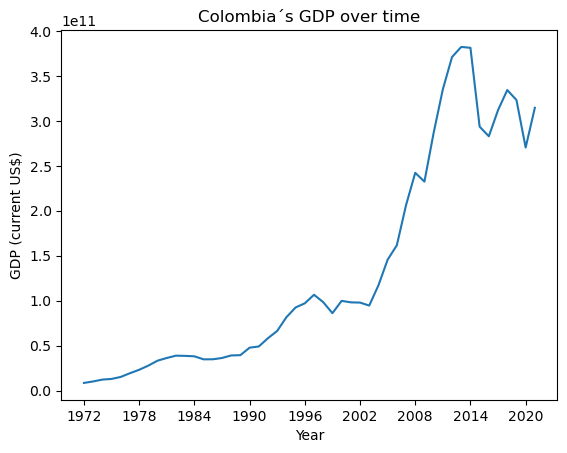

In [93]:
#Lets check Colombias GDP
colombia_gdp = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'] == 'GDP (current US$)')]

years = colombia_gdp.columns[2:]
gdp_values = colombia_gdp.iloc[0, 2:].astype(float)

plt.plot(years, gdp_values)
plt.title('Colombia´s GDP over time')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.xticks(years[::6], years[::6])

plt.show()

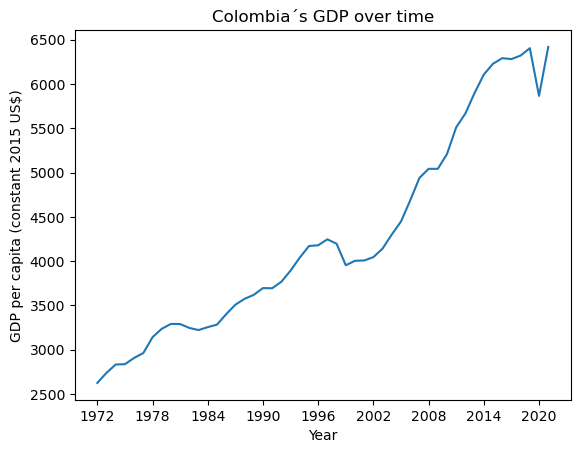

In [94]:
#Lets check Colombias GDP adjusted to inflation
colombia_gdp = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]

years = colombia_gdp.columns[2:]
gdp_values = colombia_gdp.iloc[0, 2:].astype(float)

plt.plot(years, gdp_values)
plt.title('Colombia´s GDP over time')
plt.xlabel('Year')
plt.ylabel('GDP per capita (constant 2015 US$)')
plt.xticks(years[::6], years[::6])

plt.show()

In [ ]:

colombia_oil = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'].str.contains('Oil rents'))]
colombia_gdp = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]
colombia_oil.replace('..', np.nan, inplace=True)
years = colombia_gdp.columns[2:]
gdp_values = colombia_gdp.iloc[0, 2:].astype(float)
oil_values = colombia_oil.iloc[0, 2:].astype(float)


plt.plot(years, gdp_values)
plt.plot(years, oil_values)
plt.title('Colombia GDP and Oil rents over time')
plt.xlabel('Year')
plt.ylabel('GDP per capita (constant 2015 US$) / Oil rents (% of GDP)')
plt.xticks(years[::6], years[::6])
plt.legend(['GDP', 'Oil rents'])

plt.show()

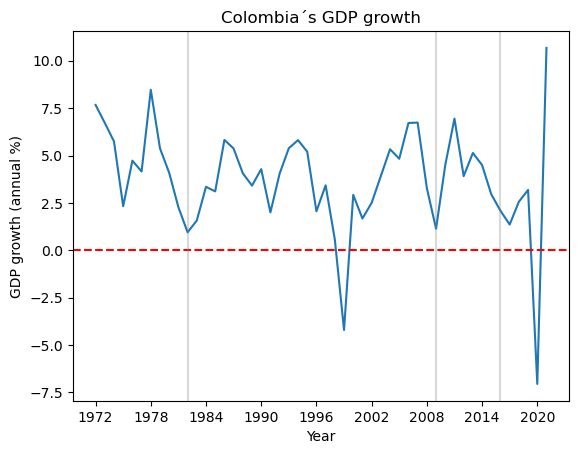

In [134]:
#Lets check Colombias GDP growth
colombia_gdp = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'] == 'GDP growth (annual %)')]

years = colombia_gdp.columns[2:]
gdp_values = colombia_gdp.iloc[0, 2:].astype(float)

plt.plot(years, gdp_values)

plt.title('Colombia´s GDP growth')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(years[::6], years[::6])

plt.axvline(x='1982', color='gray', alpha=0.3)
plt.axvline(x='2009', color='gray', alpha=0.3)
plt.axvline(x='2016', color='gray', alpha=0.3)

plt.show()

C:\Users\sferreira\AppData\Local\Temp\ipykernel_15272\4071519688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colombia_oil.replace('..', np.nan, inplace=True)


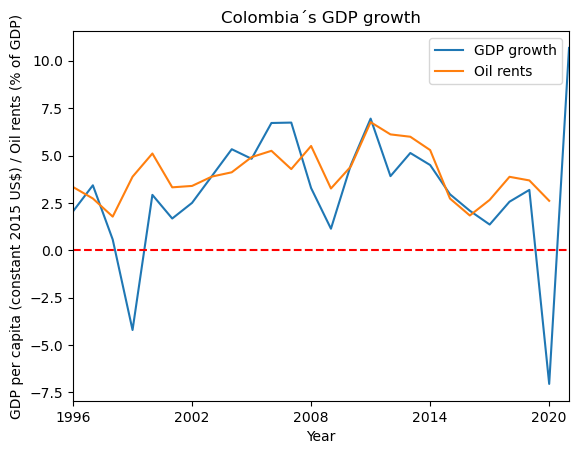

In [132]:
#Lets check Colombias GDP growth and oil
colombia_gdp = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'] == 'GDP growth (annual %)')]
colombia_oil = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'].str.contains('Oil rents'))]
colombia_oil.replace('..', np.nan, inplace=True)

years = colombia_gdp.columns[2:]
gdp_values = colombia_gdp.iloc[0, 2:].astype(float)
oil_values = colombia_oil.iloc[0, 2:].astype(float)


plt.plot(years, gdp_values, label='GDP growth')
plt.plot(years, oil_values, label='Oil rents')
plt.title('Colombia´s GDP growth')
plt.xlabel('Year')
plt.ylabel('GDP per capita (constant 2015 US$) / Oil rents (% of GDP)')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(years[::6], years[::6])
plt.xlim('1996', '2021')
plt.legend()

plt.show()

In [ ]:
#Compare colombias gdp to some countries of the region
colombia_gdp = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'] == 'GDP (current US$)')]
brazil_gdp = dt[(dt['Country Name'] == 'Brazil') & (dt['Series Name'] == 'GDP (current US$)')]
chile_gdp = dt[(dt['Country Name'] == 'Chile') & (dt['Series Name'] == 'GDP (current US$)')]
argentina_gdp = dt[(dt['Country Name'] == 'Argentina') & (dt['Series Name'] == 'GDP (current US$)')]

years = colombia_gdp.columns[2:]
colombia_values = colombia_gdp.iloc[0, 2:].astype(float)
brazil_values = brazil_gdp.iloc[0, 2:].astype(float)
chile_values = chile_gdp.iloc[0, 2:].astype(float)
argentina_values = argentina_gdp.iloc[0, 2:].astype(float)

plt.plot(years, colombia_values, label='Colombia')
plt.plot(years, brazil_values, label='Brazil')
plt.plot(years, chile_values, label='Chile')
plt.plot(years, argentina_values, label='Argentina')

plt.title('GDP over time')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')

plt.xticks(years[::5], years[::5])

plt.legend()

plt.show()

In [ ]:
#Compare colombias gdp per capita to some countries of the region
colombia_gdp = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]
brazil_gdp = dt[(dt['Country Name'] == 'Brazil') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]
chile_gdp = dt[(dt['Country Name'] == 'Chile') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]
argentina_gdp = dt[(dt['Country Name'] == 'Argentina') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]

years = colombia_gdp.columns[2:]
colombia_values = colombia_gdp.iloc[0, 2:].astype(float)
brazil_values = brazil_gdp.iloc[0, 2:].astype(float)
chile_values = chile_gdp.iloc[0, 2:].astype(float)
argentina_values = argentina_gdp.iloc[0, 2:].astype(float)

plt.plot(years, colombia_values, label='Colombia')
plt.plot(years, brazil_values, label='Brazil')
plt.plot(years, chile_values, label='Chile')
plt.plot(years, argentina_values, label='Argentina')

plt.title('GDP per capita over time')
plt.xlabel('Year')
plt.ylabel('GDP(current US$)')

plt.xticks(years[::5], years[::5])

plt.legend()

plt.show()

In [ ]:
colombia_gdp = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'] == 'GDP growth (annual %)')]
brazil_gdp = dt[(dt['Country Name'] == 'Brazil') & (dt['Series Name'] == 'GDP growth (annual %)')]
chile_gdp = dt[(dt['Country Name'] == 'Chile') & (dt['Series Name'] == 'GDP growth (annual %)')]
argentina_gdp = dt[(dt['Country Name'] == 'Argentina') & (dt['Series Name'] == 'GDP growth (annual %)')]


years = colombia_gdp.columns[2:]
colombia_values = colombia_gdp.iloc[0, 2:].astype(float)
brazil_values = brazil_gdp.iloc[0, 2:].astype(float)
chile_values = chile_gdp.iloc[0, 2:].astype(float)
argentina_values = argentina_gdp.iloc[0, 2:].astype(float)

plt.plot(years, colombia_values, label='Colombia')
plt.plot(years, brazil_values, label='Brazil')
plt.plot(years, chile_values, label='Chile')
plt.plot(years, argentina_values, label='Argentina')

plt.title('GDP  growth over time')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')

plt.xticks(years[::6], years[::6])

plt.legend()
plt.xlim('1996', '2021')
plt.axhline(y=0, color='r', linestyle='--')


plt.show()

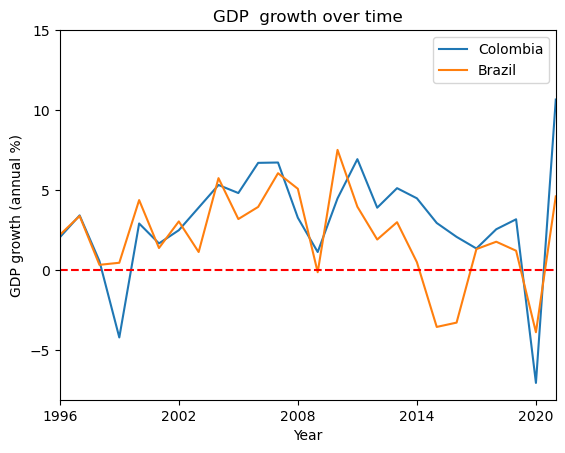

In [102]:
#compare Colombia´s frowth to Brazil´s
plt.plot(years, colombia_values, label='Colombia')
plt.plot(years, brazil_values, label='Brazil')

plt.title('GDP  growth over time')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')

# Set the tick locations and labels for every 5th year
plt.xticks(years[::6], years[::6])

# Add a legend to the plot
plt.legend()
plt.xlim('1996', '2021')
plt.axhline(y=0, color='r', linestyle='--')


plt.show()

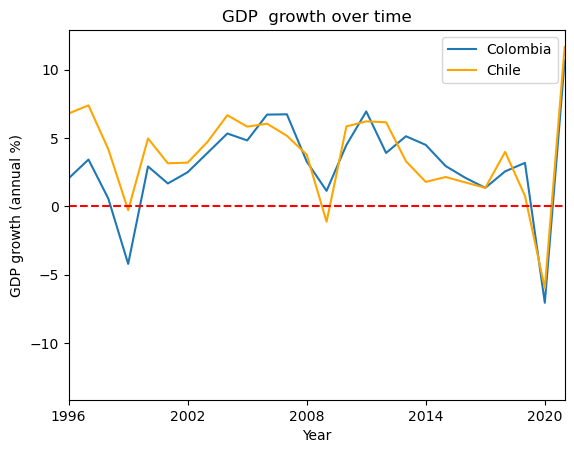

In [124]:
#compare Colombia´s frowth to Chile´s
plt.plot(years, colombia_values, label='Colombia')
plt.plot(years, chile_values, label='Chile', color='orange')

plt.title('GDP  growth over time')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')

plt.xticks(years[::6], years[::6])

# Add a legend to the plot
plt.legend()
plt.xlim('1996', '2021')
plt.axhline(y=0, color='r', linestyle='--')


plt.show()

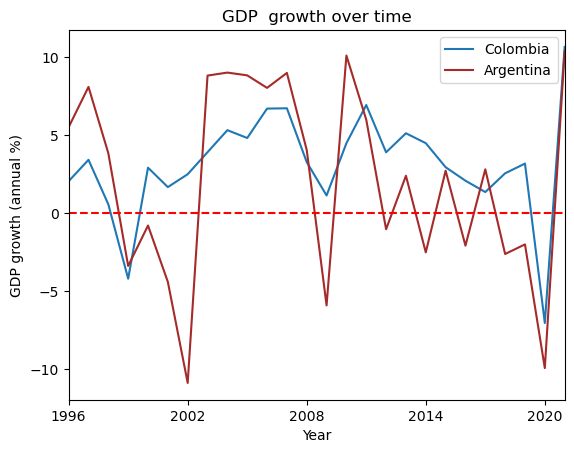

In [127]:
#compare Colombia´s frowth to Argentina´s´s
plt.plot(years, colombia_values, label='Colombia')
plt.plot(years, argentina_values, label='Argentina', color ="brown")

plt.title('GDP  growth over time')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')

# Set the tick locations and labels for every 5th year
plt.xticks(years[::6], years[::6])

# Add a legend to the plot
plt.legend()
plt.xlim('1996', '2021')
plt.axhline(y=0, color='r', linestyle='--')


plt.show()

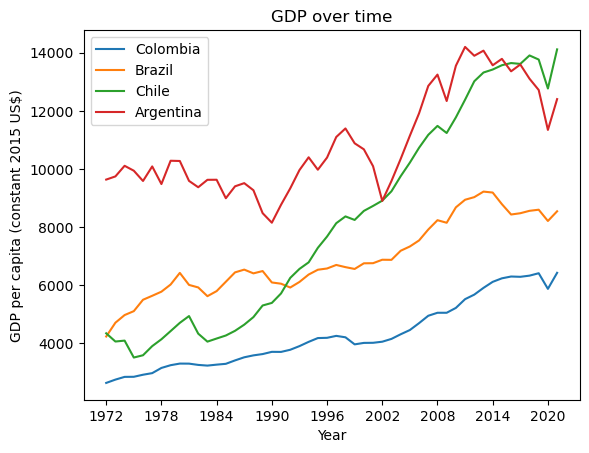

In [129]:
#Comparing Gdp per capita ajusted for inflation of the countries
colombia_gdp = dt[(dt['Country Name'] == 'Colombia') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]
brazil_gdp = dt[(dt['Country Name'] == 'Brazil') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]
chile_gdp = dt[(dt['Country Name'] == 'Chile') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]
argentina_gdp = dt[(dt['Country Name'] == 'Argentina') & (dt['Series Name'] == 'GDP per capita (constant 2015 US$)')]

years = colombia_gdp.columns[2:]
colombia_values = colombia_gdp.iloc[0, 2:].astype(float)
brazil_values = brazil_gdp.iloc[0, 2:].astype(float)
chile_values = chile_gdp.iloc[0, 2:].astype(float)
argentina_values = argentina_gdp.iloc[0, 2:].astype(float)

plt.plot(years, colombia_values, label='Colombia')
plt.plot(years, brazil_values, label='Brazil')
plt.plot(years, chile_values, label='Chile')
plt.plot(years, argentina_values, label='Argentina')

plt.title('GDP over time')
plt.xlabel('Year')
plt.ylabel('GDP per capita (constant 2015 US$)')

plt.xticks(years[::6], years[::6])

plt.legend()

plt.show()

In [140]:
#let organize the data set so we can do regresions
pivoted_dt = dt.groupby(['Country Name', 'Series Name'])['2005'].first().unstack()

In [141]:
pivoted_dt

Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),...,"School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,133.071,31.114854912062,43.0159066808059,..,0.063495466170261,13.6,..,..,..,..,...,98.0998916625977,0.547689974308014,18.6168098449707,31.1111111111111,652860,..,..,9.5,..,4.47468958963317
Africa Eastern and Southern,117.584240435768,9.77918381742331,3.03452472258519,..,1.00285715118919,..,..,775.335359642843,742.787113670108,28.0128095360071,...,95.9905090332031,0.887009978294373,33.1320190429688,58.6868687878788,15142774.169,..,..,66.7708333333333,..,3.81460356307841
Africa Western and Central,131.726192700917,24.2072622235042,1.509503702698,..,0.501186433220843,..,..,143.552139705925,577.477848760427,27.09171480339,...,90.0113525390625,0.815079987049103,30.6235809326172,53.8888886666667,9166270,..,..,59.525,..,4.57026468551614
Albania,18.869,18.8453087247237,5.20855018587361,99.8,1.33820939947885,60.1,..,1722.07284972507,719.584378082987,23.0129911473171,...,100.676040649414,0.978039979934692,77.9093933105469,77.7777777777778,28750,..,..,41,6.21661566608379,1.82642935665107
Algeria,9.214,7.69131487186431,58.4469124424291,..,2.85799339804472,..,..,895.842391939239,983.682159828551,47.2051950916585,...,107.586097717285,0.999260008335114,78.9892120361328,63.3333333333333,2381740,..,..,22,11.9100885597204,2.57616153899167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,64.426,8.98999161090193,50.2463054187192,97,..,..,..,..,..,14.1112433423727,...,88.2253189086914,1.02751994132996,89.6410064697266,..,6020,4.65694670534971,..,74.5,..,2.85137224443691
World,53.3863285175373,3.23716768926478,..,..,4.18375102507342,..,..,2639.86826042761,1756.01182564003,27.1658176622031,...,102.185997009277,0.950500011444092,64.1115036010742,..,134079638.006,14.0927439827442,..,50.720245398773,..,2.31683596204158
"Yemen, Rep.",96.707,10.5523434439208,169.761904761905,..,0.990118960625188,..,..,173.212184550852,308.966729987063,..,...,89.1194000244141,0.651859998703003,46.4469604492188,56.6666666666667,527970,..,..,63.5,3.06478325138235,4.69803152070819


In [144]:
pivoted_dt= pivoted_dt.rename(columns={"GDP (current US$)":"GDP", 'School enrollment, primary (% gross)':"School enrollment","Births attended by skilled health staff (% of total)": "Births attended by skilled health staff"})

In [154]:
#Lets to some regresions
y = pivoted_dt['GDP']
y = y.replace('..', np.nan)
y = y.dropna()
y.fillna(y.mean(), inplace=True)

# Select the independent variables
X = pivoted_dt[['Life expectancy at birth, total (years)', 
                'School enrollment', 
                'Urban population growth (annual %)', 
                'Births attended by skilled health staff']]

# Check for missing values and handle them appropriately
X = X.replace('..', np.nan)
X = X.dropna()
X.fillna(X.mean(), inplace=True)
y = y[X.index]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model using the training data

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the performance of the model using the testing data
score = model.score(X_test, y_test)
print(f'R^2 score: {score:.2f}')


TypeError: Could not convert 6226199249.32211512233712292.51310094246800.2338052073539.38058103198223709.4395000000003159905484.3924936970918699.25231022962962.962961297892893576.4198737095012.2824900469950.090332359776536.31285695328522026.763316092273276.01513245716099.0057983620000015968723404.255369442943089.4309381950000030207567316.6202385714762230.03914615000006567654493.508314868136000796938120.1814069549077918.6967711222953328.67049918907108.09702891630177209.999531402847.8731129869284035.32186146352742.033131117113045.65222972241336.9100996293046161.8326219509850837.27451173108598778.6849307102490.01581337894284.8516886879187178.9386649307057.033148827299477.20007122314960843.9222285965892360.54145619193046.094653845122.87207411964484667.91026650001213.8260920040642476.981724036917016.5945835098187.66374264383610018433411267.2553137143471328.274264467336457.17708633194.726566364255555.55555635777570135.52254932002537834.1110409558236937.13102608150112.043106988566419.544150708500089600665557.4043146980000008217369092.652241098425900.7411614106790200.22393178126491.9094912401139453.973810523525439926.816782232363361.72040091300706.181589616896404.0811910867005359.21759742533.642382980484920.16558204885494686.381856107528457.6772196945232435.85705054692.093739582783318.38811027702254.386646410823633.254262846864211175.110744675209.8984247875422204.4141849805732.96203695555555.555555421300000026783543667.0642937071767.25576587029054.444652824880550.3439657184064657.2953276749691191.23637829451127901.29757034456.7578181570082162.19113211158292.9369634450730646.5810518777863403.9372742521807.291513174572045.384885269466306.17916852963067.0496820381595512.902285868618224.017226452138291.54249954890353.2609211876989655.9073032400000147083996033.6031858217147203.7311243868485.74284831467035389.812588998589.562857123671733.895218737897744.7948112133944.253532934901071332.98480798630136.98632460248026.177832735558726.256256166282894904.232863013649014.132432621936284.72709092769876.2717003459863.0989353061167470.32221497336498.97181682350934.8513294900000047334148578.41643659251525.859326097677571.83739802487891227.9182611485357.9262564028857163.1737672280120.479412160002995.84335859269849.145233655909664.1423143534102611.4971163362437.56247515449.730156407287650.78971376663002936019525.602416488750452.60067877476221382.1012502819001636975231966.93796901240478.938802026940478.9399495021112140.562988348836.4714203084193.508272523471532.010832257174480.7859762343022650.87428542070109.7090310588433068.85497248394160.355028130258041.46706685348181515.9536238632283.76502114720129550.0956321335612.222334383315656.99096175670536601.00614217175927778.76258600713.826271061000000308884284051.22237608264575121.831081991677.5033183618365120.9265419206980.44492120055291992.938190452900163743939004865892972.2759510737500188.112376060606060.6061107419961717.693306144336269.51197253876704.92135742433550540.5514300311314.2928391452130044530494505.494598452791982.7024764017107992.3912932340855.31852476801793.1594291785847531.40157136450274.673234328459700114.75511009032665.387627683225959.2468919103254.5454551650494366.99875127807618360.97162808723476.71936206395970.6504238334596300.495552862587.816571288868489078.9871050602379488.521050602379488.521153715822717.5124405791044.7761547203703.7037041135555555.55556579948925.925926820762533980.595820762533980.595819839325427.15335182105414.39191793388732.29125392218088878.779418284865884.998134203830734.9672312327536.4178918399046025.2688189318549680.384462283556.7026662281482855.46518261797606.14971915982282462.378632273007553.5687506308311476.638103901996.3702457864580022909507.44558999239221858.5583989239370109.4698180617467964.6022544805454545.45130391991930006930925818089.8417362857683.854514307509838.8053394962552.336108145510008134.7557633255618.27314428000000512570000047784318320003.916746344766.20448331870169.149775755215200 to numeric

In [155]:
X

Series Name,"Life expectancy at birth, total (years)",School enrollment,Urban population growth (annual %),Births attended by skilled health staff
Country Name,,,,
Albania,76.621,100.676040649414,1.82642935665107,99.8
Argentina,75.139,115.29914855957,1.22359234802314,99.1
Armenia,71.792,95.4410629272461,-0.761535435957295,97.8
Australia,80.8414634146341,102.739318847656,1.35808044012136,99.4
Austria,79.3317073170732,100.832618713379,0.204609524563365,98.6
...,...,...,...,...
United States,77.4878048780488,101.8740234375,1.13588459113456,99.4
Uruguay,76.194,114.185752868652,0.37511984900266,99.9
Uzbekistan,67.49,97.0458602905273,2.16345136994461,100


In [157]:
y

Country Name
Afghanistan                    6226199249.32211
Africa Eastern and Southern     512233712292.51
Africa Western and Central     310094246800.233
Albania                        8052073539.38058
Algeria                        103198223709.439
                                     ...       
West Bank and Gaza                   5125700000
World                          47784318320003.9
Yemen, Rep.                    16746344766.2044
Zambia                         8331870169.14977
Zimbabwe                             5755215200
Name: GDP, Length: 254, dtype: object

I failed good thing i can download the dat with a different format

In [49]:
df = pd.read_csv('reg.csv')
df.head()

,Time,Time Code,Country Name,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],Population density (people per sq. km of land area) [EN.POP.DNST],Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY],...,High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS],Statistical Capacity Score (Overall Average) (scale 0 - 100) [IQ.SCI.OVRL],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]","Total debt service (% of exports of goods, services and primary income) [DT.TDS.DECT.EX.ZS]",Net migration [SM.POP.NETM],"Personal remittances, received (current US$) [BX.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",Net official development assistance and official aid received (current US$) [DT.ODA.ALLD.CD]
0,2005,YR2005,Colombia,COL,42220940,1.36565233876962,1141750,38.0540243352862,..,10.7,...,..,78.8888888888889,29.1129205657531,125.9719859,37497341480,39.9821599853416,-41348,3345610321.40797,10235417315.1376,643070007.324219
1,2005,YR2005,Afghanistan,AFG,24411191,3.57650800354462,652860,37.4272741210923,..,..,...,..,31.1111111111111,45.8546199001075,125.8877109,..,..,252185,0,271000000,2815100097.65625
2,2005,YR2005,Albania,ALB,3011487,-0.511790116421897,28750,109.908284671533,18.5,0.6,...,..,77.7777777777778,40.7100107067846,91.59316472,2126166749.1,6.21661566608379,-50855,1289704315.92613,262479012.637464,315079986.572266
3,2005,YR2005,Algeria,DZA,32956690,1.36408196251206,2381740,13.8372324435077,..,..,...,..,63.3333333333333,64.3024633707239,165.0763745,17082006705.4,11.9100885597204,-111256,169999999.999993,1155999999.99995,347380004.882813
4,2005,YR2005,American Samoa,ASM,57254,-0.647634575615904,200,286.27,..,..,...,..,..,176,111.1582343,..,..,-1697,..,..,..


In [6]:
df.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Population, total [SP.POP.TOTL]',
       'Population growth (annual %) [SP.POP.GROW]',
       'Surface area (sq. km) [AG.SRF.TOTL.K2]',
       'Population density (people per sq. km of land area) [EN.POP.DNST]',
       'Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC]',
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY]',
       'GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]',
       'GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]',
       'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
       'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]',
       'Income share held by lowest 20% [SI.DST.FRST.20]',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]',
       'Adolescent fertility rate (births per 1,000 women ages 15-19) [S

In [33]:
print(df['Time'].unique())

['2005' nan 'Data from database: World Development Indicators'
 'Last Updated: 03/01/2023']


In [50]:
# Convert the "Time" column to a numeric data type
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
# Keep only the rows where Time is equal to 2005
df = df[df['Time'] == 2005]

# Print the first few rows of the filtered dataframe
df

,Time,Time Code,Country Name,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],Population density (people per sq. km of land area) [EN.POP.DNST],Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY],...,High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS],Statistical Capacity Score (Overall Average) (scale 0 - 100) [IQ.SCI.OVRL],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]","Total debt service (% of exports of goods, services and primary income) [DT.TDS.DECT.EX.ZS]",Net migration [SM.POP.NETM],"Personal remittances, received (current US$) [BX.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",Net official development assistance and official aid received (current US$) [DT.ODA.ALLD.CD]
0,2005.0,YR2005,Colombia,COL,42220940,1.36565233876962,1141750,38.0540243352862,..,10.7,...,..,78.8888888888889,29.1129205657531,125.9719859,37497341480,39.9821599853416,-41348,3345610321.40797,10235417315.1376,643070007.324219
1,2005.0,YR2005,Afghanistan,AFG,24411191,3.57650800354462,652860,37.4272741210923,..,..,...,..,31.1111111111111,45.8546199001075,125.8877109,..,..,252185,0,271000000,2815100097.65625
2,2005.0,YR2005,Albania,ALB,3011487,-0.511790116421897,28750,109.908284671533,18.5,0.6,...,..,77.7777777777778,40.7100107067846,91.59316472,2126166749.1,6.21661566608379,-50855,1289704315.92613,262479012.637464,315079986.572266
3,2005.0,YR2005,Algeria,DZA,32956690,1.36408196251206,2381740,13.8372324435077,..,..,...,..,63.3333333333333,64.3024633707239,165.0763745,17082006705.4,11.9100885597204,-111256,169999999.999993,1155999999.99995,347380004.882813
4,2005.0,YR2005,American Samoa,ASM,57254,-0.647634575615904,200,286.27,..,..,...,..,..,176,111.1582343,..,..,-1697,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2005.0,YR2005,Sub-Saharan Africa,SSF,766978666,2.73684971193542,24309044.169,32.2720755145065,..,48.7,...,..,..,45.8983391170663,..,..,..,-495797,20122936830.4128,19612013688.5516,32838650146.4844
262,2005.0,YR2005,Sub-Saharan Africa (excluding high income),SSA,766895808,2.73710079115408,24308584.169,32.2692136902344,..,..,...,..,56.4021163492064,45.8249713098886,..,242887050955.5,9.3723548043116,-496048,20110835739.5037,19531283949.4607,32783320144.6533
263,2005.0,YR2005,Sub-Saharan Africa (IDA & IBRD countries),TSS,766978666,2.73684971193542,24309044.169,32.2720755145065,..,..,...,..,56.4021163492064,45.8983391170663,..,..,..,-495797,20122936830.4128,19612013688.5516,30776150146.4844
264,2005.0,YR2005,Upper middle income,UMC,2243536298,0.740753794443719,54600581.8,42.1033780328917,..,15.8,...,..,73.4757266096866,54.3300971691044,..,1641251612434.2,13.9330893263331,-897565,65388422362.3006,231447878300.987,32112399751.4248


In [51]:
df.replace('..', np.nan, inplace=True)
df

,Time,Time Code,Country Name,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],Population density (people per sq. km of land area) [EN.POP.DNST],Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY],...,High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS],Statistical Capacity Score (Overall Average) (scale 0 - 100) [IQ.SCI.OVRL],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]","Total debt service (% of exports of goods, services and primary income) [DT.TDS.DECT.EX.ZS]",Net migration [SM.POP.NETM],"Personal remittances, received (current US$) [BX.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",Net official development assistance and official aid received (current US$) [DT.ODA.ALLD.CD]
0,2005.0,YR2005,Colombia,COL,42220940,1.36565233876962,1141750,38.0540243352862,NaN,10.7,...,NaN,78.8888888888889,29.1129205657531,125.9719859,37497341480,39.9821599853416,-41348,3345610321.40797,10235417315.1376,643070007.324219
1,2005.0,YR2005,Afghanistan,AFG,24411191,3.57650800354462,652860,37.4272741210923,NaN,NaN,...,NaN,31.1111111111111,45.8546199001075,125.8877109,NaN,NaN,252185,0,271000000,2815100097.65625
2,2005.0,YR2005,Albania,ALB,3011487,-0.511790116421897,28750,109.908284671533,18.5,0.6,...,NaN,77.7777777777778,40.7100107067846,91.59316472,2126166749.1,6.21661566608379,-50855,1289704315.92613,262479012.637464,315079986.572266
3,2005.0,YR2005,Algeria,DZA,32956690,1.36408196251206,2381740,13.8372324435077,NaN,NaN,...,NaN,63.3333333333333,64.3024633707239,165.0763745,17082006705.4,11.9100885597204,-111256,169999999.999993,1155999999.99995,347380004.882813
4,2005.0,YR2005,American Samoa,ASM,57254,-0.647634575615904,200,286.27,NaN,NaN,...,NaN,NaN,176,111.1582343,NaN,NaN,-1697,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2005.0,YR2005,Sub-Saharan Africa,SSF,766978666,2.73684971193542,24309044.169,32.2720755145065,NaN,48.7,...,NaN,NaN,45.8983391170663,NaN,NaN,NaN,-495797,20122936830.4128,19612013688.5516,32838650146.4844
262,2005.0,YR2005,Sub-Saharan Africa (excluding high income),SSA,766895808,2.73710079115408,24308584.169,32.2692136902344,NaN,NaN,...,NaN,56.4021163492064,45.8249713098886,NaN,242887050955.5,9.3723548043116,-496048,20110835739.5037,19531283949.4607,32783320144.6533
263,2005.0,YR2005,Sub-Saharan Africa (IDA & IBRD countries),TSS,766978666,2.73684971193542,24309044.169,32.2720755145065,NaN,NaN,...,NaN,56.4021163492064,45.8983391170663,NaN,NaN,NaN,-495797,20122936830.4128,19612013688.5516,30776150146.4844
264,2005.0,YR2005,Upper middle income,UMC,2243536298,0.740753794443719,54600581.8,42.1033780328917,NaN,15.8,...,NaN,73.4757266096866,54.3300971691044,NaN,1641251612434.2,13.9330893263331,-897565,65388422362.3006,231447878300.987,32112399751.4248


In [56]:
df = df[['School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]', 
         'Urban population growth (annual %) [SP.URB.GROW]', 
         'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]', 
         'Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]', 
         'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]"]]
df


,"School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]",Urban population growth (annual %) [SP.URB.GROW],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]"
0,1.03676998615265,1.89847998807834,73.081,92.6,4.82876110795085,21.5
1,0.547689974308014,4.47468958963317,58.361,NaN,11.2297148236429,108.6
2,0.978039979934692,1.82642935665107,76.621,99.8,5.52642424695465,20
3,0.999260008335114,2.57616153899167,72.061,NaN,5.89999999966911,33.8
4,NaN,-0.75840230789254,NaN,NaN,-0.408163265306129,NaN
...,...,...,...,...,...,...
261,0.85929000377655,4.16225274388331,53.4621950485481,NaN,6.00507947326344,124.2
262,0.859269976615906,4.16279139126978,53.4601779317098,NaN,6.00261573032112,124.153144051129
263,0.85929000377655,4.16225274388331,53.4621950485481,NaN,6.00507947326341,124.147550785516
264,0.991729974746704,2.6228689570992,72.5380082760974,NaN,7.74560025877649,26


In [60]:
imputer = SimpleImputer(strategy='mean')

# Fit the imputer object to the dataframe
imputer.fit(df)

# Transform the dataframe by replacing the NaN values with the mean value of each numerical column
df_imputed = df.copy()
df_imputed[['School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]', 
            'Urban population growth (annual %) [SP.URB.GROW]', 
            'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]', 
            'Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]', 
            'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
            "Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]"]] = imputer.transform(df)

# Print the first few rows of the imputed dataframe
df_imputed.head()

,"School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]",Urban population growth (annual %) [SP.URB.GROW],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]"
0,1.036770,1.898480,73.081000,92.600000,4.828761,21.50000
1,0.547690,4.474690,58.361000,88.037425,11.229715,108.60000
2,0.978040,1.826429,76.621000,99.800000,5.526424,20.00000
3,0.999260,2.576162,72.061000,88.037425,5.900000,33.80000
4,0.961466,-0.758402,68.492552,88.037425,-0.408163,47.93637


Im going to try several regresions with the data that i chose in hopes of a good model

In [66]:


X = df_imputed[['School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]', 'Urban population growth (annual %) [SP.URB.GROW]', 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]', 'Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]',"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]"]]
y = df_imputed['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model to the training data
model = LinearRegression().fit(X_train, y_train)

# Predict the GDP for the testing set
y_pred = model.predict(X_test)

# Evaluate the model using the R-squared value
r2 = model.score(X_test, y_test)
for i, col in enumerate(X.columns):
    print(f"Beta for {col}: {model.coef_[i]}")

print("R-squared:", r2)

Beta for School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]: -4.097511660559626
Beta for Urban population growth (annual %) [SP.URB.GROW]: 0.13602001127007068
Beta for Life expectancy at birth, total (years) [SP.DYN.LE00.IN]: -0.06921814055443347
Beta for Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]: 0.006294823797283213
Beta for Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]: -0.00967389359541523
R-squared: 0.033004008591781875


In [68]:
# Fit the linear regression model to the entire dataset
model = LinearRegression().fit(X, y)

# Perform cross-validation and get the R-squared values
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the R-squared values for each fold
print("R-squared scores for each fold:", cv_scores)

# Print the mean R-squared value across all folds
print("Mean R-squared score:", cv_scores.mean())

R-squared scores for each fold: [-0.07746879  0.05070438 -0.00632883 -0.14512849  0.12599084]
Mean R-squared score: -0.010446176437001919


In [78]:
# Define the number of folds for cross-validation
n_folds = 5

# Initialize an empty array to store the betas for each fold
betas = np.zeros((n_folds, X.shape[1]))

# Initialize the cross-validation object
kf = KFold(n_splits=n_folds)

# Loop over the folds of cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the linear regression model to the training data for this fold
    model = LinearRegression().fit(X_train, y_train)
    
    # Store the coefficients (betas) for this fold
    betas[i] = model.coef_
    
    # Print the betas for this fold
    print(f"Betas for fold {i+1}: {model.coef_}")

# Calculate the mean betas across all folds
mean_betas = np.mean(betas, axis=0)

# Print the mean betas
print("Mean betas across all folds:", mean_betas)

Betas for fold 1: [6.43846885e+00 5.22187184e-01 2.47291966e-02 2.07293916e-03
 1.17119867e-02]
Betas for fold 2: [-2.46441138e+00  4.01897160e-01 -9.88812845e-04  1.82938879e-02
  2.53815023e-03]
Betas for fold 3: [-1.81924295  0.39268103  0.01863378  0.01091015  0.00482992]
Betas for fold 4: [-3.18570937  0.52810837  0.00436735  0.01890595  0.00392663]
Betas for fold 5: [-1.27708401  0.33648835 -0.02890688  0.01241516  0.00142689]
Mean betas across all folds: [-0.46159577  0.43627242  0.00356693  0.01251962  0.00488671]


[-3.81851184e+01 -1.05813521e+01  1.27162434e+00 -3.52513578e-01
  2.55840699e-01  3.76787817e+01  6.13365399e+00  2.99201852e-02
 -3.96889049e-01 -1.98162364e-01 -3.03135098e-02  6.37952780e-02
  1.05941539e-03  1.17786570e-02 -1.21006108e-02  3.42992650e-03
 -2.08952560e-03  3.16813817e-03  1.15335588e-03 -2.99899696e-04]
R-squared: 0.16138135852783586


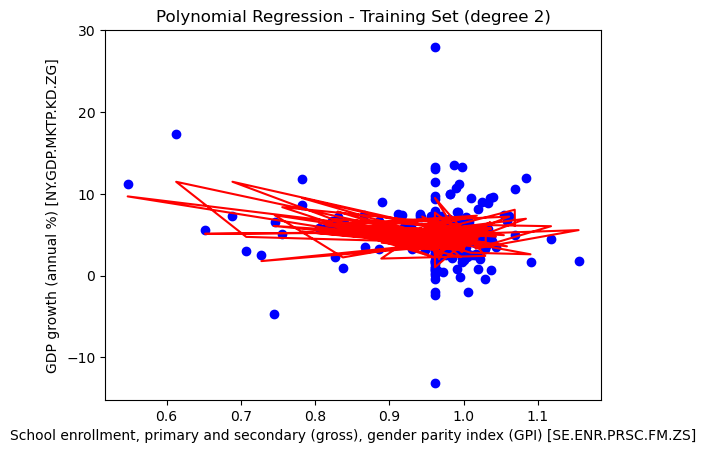

In [81]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the linear regression model to the training data
model = LinearRegression().fit(X_train, y_train)

# Generate predicted values for the training set
y_train_pred = model.predict(X_train)

# Evaluate the model using the R-squared value
r2 = model.score(X_test, y_test)

print(model.coef_)
print("R-squared:", r2)

# Plot the data and the polynomial fit
plt.scatter(X_train[:,0], y_train, color='blue')
plt.plot(X_train[:,0], y_train_pred, color='red')
plt.title(f'Polynomial Regression - Training Set (degree 2)')
plt.xlabel('School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]')
plt.ylabel('GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]')
plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through polynomial degrees from 2 to 8
for degree in range(2, 9):
    # Fit a polynomial regression model with the current degree
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model = LinearRegression().fit(X_poly_train, y_train)

    # Predict the target variable for the testing set
    y_pred = model.predict(X_poly_test)

    # Evaluate the model using the R-squared value
    r2 = r2_score(y_test, y_pred)
    print(f"Degree {degree} R-squared: {r2}")

Degree 2 R-squared: 0.16138135852837476
Degree 3 R-squared: -0.9074733183280566
Degree 4 R-squared: -3860.1539500131094
Degree 5 R-squared: -116046572.36510062
Degree 6 R-squared: -368927294.7458428
Degree 7 R-squared: -227156183.3246377
Degree 8 R-squared: -791681859.4794413


Didnt really find a good model, shiuld have picked better independent variales.